<center><h1 style="font-family: 'Georgia'; color: #f2f2f2; background-color:#800040; padding: 20px;"> Model Training: Text Message Spam Detection
    </h1></center>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
This is the model training notebook for the 60-40 dataset using default parameters.
</p>

<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Import Libraries and Load Dataset</h1>

In [2]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [3]:
#LOAD THE DATASET
df = pd.read_csv('../datasets/training_datasets/training_data6040.csv') 
df.head(10)

,tag,message_transformed
0,0,eaten day sit stare juici pizza ca eat med rui...
1,0,10 min later k
2,0,heehe funni tho
3,0,think need go late school night especi one cla...
4,0,tri neva mate
5,0,infact happi new year see
6,0,havent
7,0,ya go restaur
8,0,deep sigh miss realli surpris gone net cafe ye...
9,0,made day great day


In [4]:
# RENAME TO PROPER COLUMN NAMES
df.rename(columns = {'tag' : 'tag',
                      'message_transformed' : 'message'}, 
          inplace=True)
df.columns

Index(['tag', 'message'], dtype='object')

In [5]:
# IT SEEMS LIKE WE HAVE NULL VALUES FROM SAVING THE DATASET, WE NEED TO DELETE THESE NULL VALUES FIRST
df.dropna(inplace=True)
df.isnull().sum()

tag        0
message    0
dtype: int64

<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Vectorizer Selection</h1>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    We will be using count vectorizer.
</p>

<p style="font-family: 'Georgia'; font-size: 14px; font-weight: 400; color: #800040;">
    Count Vectorizer is a text preprocessing technique used in natural language processing (NLP) to convert a collection of text documents into a numerical format. It works by tokenizing the text into words or n-grams and then counting the frequency of each token in each document, resulting in a matrix where rows represent documents, columns represent unique tokens, and each cell contains the count of a token in a document.
</p>


In [6]:
#Vectorizers will transform textual data to an array of numerical data
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['message']).toarray() # array of numeric values
y = df['tag'].values                       # numeric values

<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Split the Dataset</h1>

In [7]:
# SPLIT THE DATASET
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, random_state=0)

<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Loading the Models</h1>

In [8]:
#INSTALL XGBOOST
!pip install xgboost

#IMPORT THE CLASSIFICATION ALGORITHMS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [9]:
# CREATE THE OBJECTS
svc = SVC(random_state=0)
knc = KNeighborsClassifier(n_neighbors=5)
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(random_state=0)
lrc = LogisticRegression(random_state=0)
rfc = RandomForestClassifier(random_state=0)
abc = AdaBoostClassifier(random_state=0)
bc = BaggingClassifier(random_state=0)
etc = ExtraTreesClassifier(random_state=0)
gdbt = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)

In [10]:
#CREATE A LIBRARY FOR THE CLASSIFIER OBJECTS
models = {
    'SVC' : svc,
    'KNN' : knc,
    'BNB' : bnb,
    'DTC' : dtc,
    'LR' : lrc,
    'RFC' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GDBT' : gdbt,
    'XGB' : xgb
}

In [12]:
# IMPORT METRICS TO BE USED: [accuracy, precision, recall, f1_score]
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Training (Hold Out Validation)</h1>

In [13]:
#CREATE A FUNCTION TO TRAIN THE MODELS WITH DEFAULT PARAMETERS
def train_model(model, X_train, y_train, X_test, y_test):
    # training
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score_ = f1_score(y_test, y_pred)

    
    return accuracy, precision, recall, f1_score_

In [14]:
# STORING METRICS TO VISUALIZE LATER
accuracy_list = []
precision_list = []
f1_score_list = []
recall_list = []

In [15]:
# RUN THE TRAINING FUNCTION THEN RECORD THE SCORES THE LISTS
for name, model in models.items():
    accuracy, precision, recall, f1_score_ = train_model(model, X_train, y_train, X_test, y_test)
    
    print('For', name, ":")
    print('\t accuracy: ', accuracy)
    print('\t precision: ', precision)
    print('\t recall: ', recall)
    print('\t f1_score: ', f1_score_)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score_)

For SVC :
	 accuracy:  0.9441860465116279
	 precision:  0.9717741935483871
	 recall:  0.8925925925925926
	 f1_score:  0.9305019305019304
For KNN :
	 accuracy:  0.7162790697674418
	 precision:  1.0
	 recall:  0.32222222222222224
	 f1_score:  0.4873949579831933
For BNB :
	 accuracy:  0.9503875968992248
	 precision:  1.0
	 recall:  0.8814814814814815
	 f1_score:  0.937007874015748
For DTC :
	 accuracy:  0.9271317829457364
	 precision:  0.9626556016597511
	 recall:  0.8592592592592593
	 f1_score:  0.9080234833659491
For LR :
	 accuracy:  0.9472868217054263
	 precision:  1.0
	 recall:  0.8740740740740741
	 f1_score:  0.9328063241106719
For RFC :
	 accuracy:  0.9488372093023256
	 precision:  0.979757085020243
	 recall:  0.8962962962962963
	 f1_score:  0.9361702127659575
For AdaBoost :
	 accuracy:  0.9255813953488372
	 precision:  0.944
	 recall:  0.8740740740740741
	 f1_score:  0.9076923076923077
For BgC :
	 accuracy:  0.9302325581395349
	 precision:  0.9629629629629629
	 recall:  0.86666666

In [16]:
#CREATE A DATAFRAME TO FOR GRAPHICAL VISUALIZATION
model_performance = pd.DataFrame({'Algorithm' : models.keys(), 
                                  'Accuracy' : accuracy_list, 
                                  'Precision' : precision_list,
                                  'Recall' : recall_list,
                                  'F1 Score' : f1_score_list})
model_performance.sort_values('Accuracy', ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
8,ETC,0.951938,0.983806,0.900000,0.940039
2,BNB,0.950388,1.000000,0.881481,0.937008
5,RFC,0.948837,0.979757,0.896296,0.936170
4,LR,0.947287,1.000000,0.874074,0.932806
0,SVC,0.944186,0.971774,0.892593,0.930502
10,XGB,0.942636,0.987448,0.874074,0.927308
7,BgC,0.930233,0.962963,0.866667,0.912281
3,DTC,0.927132,0.962656,0.859259,0.908023
6,AdaBoost,0.925581,0.944000,0.874074,0.907692
9,GDBT,0.910078,0.986239,0.796296,0.881148


<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Visualizing Hold out Performances</h1>

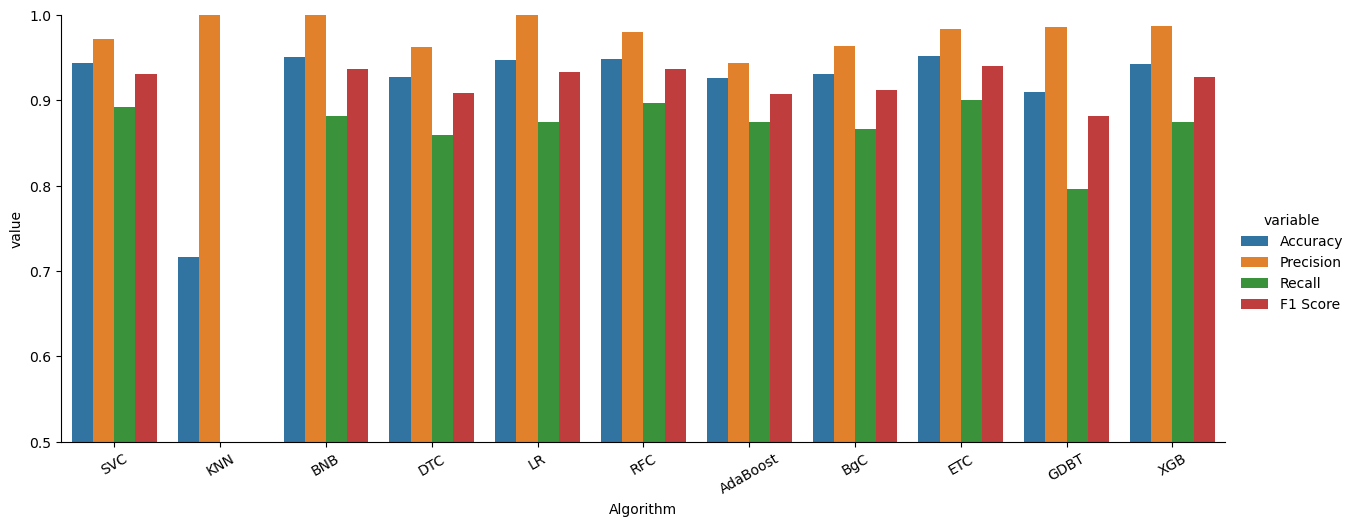

In [17]:
#TO VISUALIZE performance_df1
performance_df1 = pd.melt(model_performance, id_vars="Algorithm")

sns.catplot(x='Algorithm', 
            y='value', 
            hue='variable', 
            data=performance_df1, 
            kind='bar', 
            height=5, 
            aspect=2.5)  # Adjust the aspect value for width
plt.ylim(0.5, 1.0)
plt.xticks(rotation=30)
plt.show()


<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Training (Cross Validation)</h1>

In [18]:
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# STORE METRICS
accuracy_list_cv = []
precision_list_cv = []
recall_list_cv = []
f1_list_cv = []

In [20]:
# KFOLDS CONFIGURATION
num_folds = 5

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=0)

In [21]:
# DEFINE EVALUATION METRICS
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [22]:
# Loop through each model and perform cross-validation
for name, model in models.items():
    scores = cross_validate(estimator=model, X=X, y=y, cv=cv, scoring=scoring)
    
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_precision = np.mean(scores['test_precision'])
    mean_recall = np.mean(scores['test_recall'])
    mean_f1 = np.mean(scores['test_f1'])
    
    accuracy_list_cv.append(mean_accuracy)
    precision_list_cv.append(mean_precision)
    recall_list_cv.append(mean_recall)
    f1_list_cv.append(mean_f1)

    print(f'For {name}:')
    print(f'\t Mean Accuracy: {mean_accuracy}')
    print(f'\t Mean Precision: {mean_precision}')
    print(f'\t Mean Recall: {mean_recall}')
    print(f'\t Mean F1 Score: {mean_f1}')


For SVC:
	 Mean Accuracy: 0.9475968992248062
	 Mean Precision: 0.9505370535359647
	 Mean Recall: 0.9172069079045823
	 Mean F1 Score: 0.933480703202753
For KNN:
	 Mean Accuracy: 0.74015503875969
	 Mean Precision: 0.997872340425532
	 Mean Recall: 0.3521385172547963
	 Mean F1 Score: 0.5194842740049296
For BNB:
	 Mean Accuracy: 0.9565891472868218
	 Mean Precision: 0.9974358974358974
	 Mean Recall: 0.8939510939510941
	 Mean F1 Score: 0.9428095831269493
For DTC:
	 Mean Accuracy: 0.926201550387597
	 Mean Precision: 0.9194862411907199
	 Mean Recall: 0.8947143156445483
	 Mean F1 Score: 0.9067992498937596
For LR:
	 Mean Accuracy: 0.9587596899224806
	 Mean Precision: 0.9841271826821096
	 Mean Recall: 0.9117596001316931
	 Mean F1 Score: 0.9465473098103073
For RFC:
	 Mean Accuracy: 0.951937984496124
	 Mean Precision: 0.9797416952252508
	 Mean Recall: 0.8985932776630452
	 Mean F1 Score: 0.9373528118046253
For AdaBoost:
	 Mean Accuracy: 0.9296124031007752
	 Mean Precision: 0.9476977130453808
	 Mean R

In [23]:
#CREATE A DATAFRAME TO FOR GRAPHICAL VISUALIZATION
model_performance_cv = pd.DataFrame({'Algorithm' : models.keys(), 
                                  'Accuracy' : accuracy_list_cv, 
                                  'Precision' : precision_list_cv,
                                  'Recall' : recall_list_cv,
                                  'F1 Score' : f1_list_cv})
model_performance_cv.sort_values('Accuracy', ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
4,LR,0.958760,0.984127,0.911760,0.946547
2,BNB,0.956589,0.997436,0.893951,0.942810
8,ETC,0.955969,0.972875,0.915609,0.943305
5,RFC,0.951938,0.979742,0.898593,0.937353
10,XGB,0.949457,0.972423,0.899374,0.934464
0,SVC,0.947597,0.950537,0.917207,0.933481
6,AdaBoost,0.929612,0.947698,0.873072,0.908636
7,BgC,0.927752,0.933292,0.883131,0.907351
3,DTC,0.926202,0.919486,0.894714,0.906799
9,GDBT,0.915969,0.971695,0.814262,0.885724


<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Visualizing Cross Validation Performances</h1>

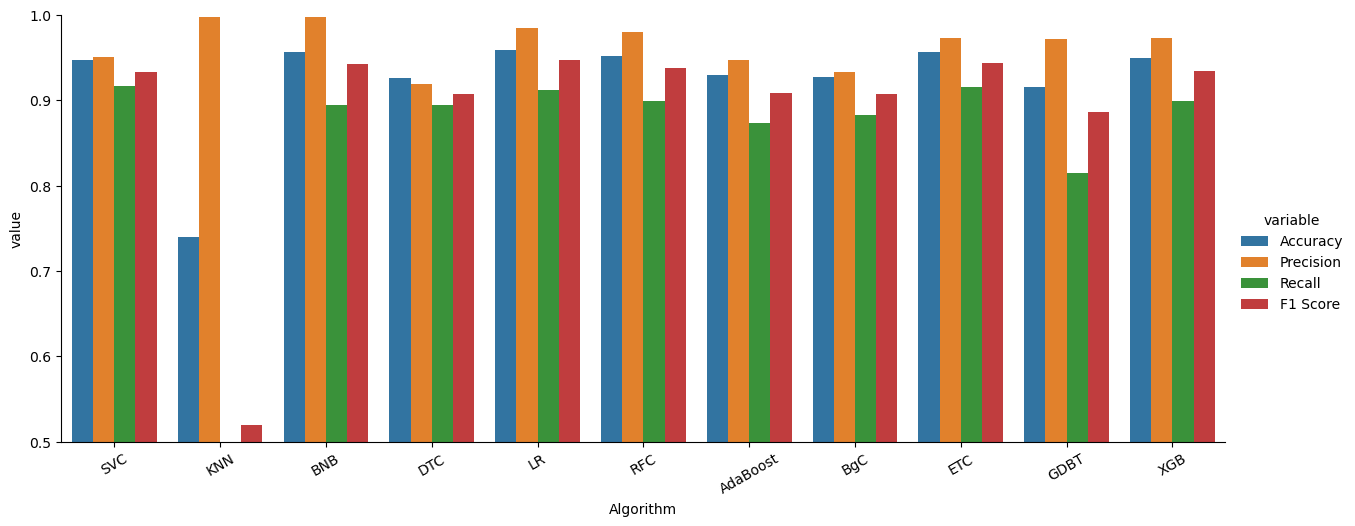

In [24]:
#TO VISUALIZE performance_df1
performance_df_cv = pd.melt(model_performance_cv, id_vars="Algorithm")

sns.catplot(x='Algorithm', 
            y='value', 
            hue='variable', 
            data=performance_df_cv, 
            kind='bar', 
            height=5, 
            aspect=2.5)  # Adjust the aspect value for width
plt.ylim(0.5, 1.0)
plt.xticks(rotation=30)
plt.show()

<h1 style="font-family: 'Georgia'; font-size: 24px; color: #008000;">Deciding the Best Model</h1>

<p style="font-family: 'Georgia'; font-size: 16px; font-weight: 800; color: #800040;">
    We will not consider hold out validation results because it's bias. We just want to compare it with cross-validated results that's why it is included in the notebook. Another thing is we will select the best model based on the average of accuracy and precision because the goal of this machine learning project is to build a model with a high level of correctness in predicting both classes.
</p>

<ul>
    <li style="font-family: 'Georgia'; font-size: 14px; font-weight: 400; color: #800040;">Accuracy: Evaluating accuracy ensures that your model correctly predicts both classes, which aligns with your goal of high correctness.</li>
    <li style="font-family: 'Georgia'; font-size: 14px; font-weight: 400; color: #800040;"> Precision: Precision focuses on the correctness of positive predictions. By considering precision, you are emphasizing the importance of correctly identifying instances of the positive class. This can be particularly relevant when false positives are costly.</li>
</ul>


In [25]:
accuracy_list_cv
precision_list_cv

def average(i):
    return (accuracy_list_cv[i] + precision_list_cv[i])/2

def list_average():
    averages= []
    for i in range (len(accuracy_list_cv)):
        avg = average(i)
        averages.append([avg, i])
    return averages

In [26]:
averages = list_average()
sorted(averages, reverse=True)

[[0.9770125223613596, 2],
 [0.9714434363022951, 4],
 [0.9658398398606873, 5],
 [0.964422120421587, 8],
 [0.960939973331926, 10],
 [0.9490669763803854, 0],
 [0.9438318056016752, 9],
 [0.9386550580730779, 6],
 [0.9305221776610726, 7],
 [0.9228438957891585, 3],
 [0.869013689592611, 1]]

<p style="font-family: 'Georgia'; font-size: 14px; font-weight: 800; color: #800040;">With mean accuracy of 95.66% and mean precision of 99.74%, the element at index position 3 of the accuracy_list_cv corresponds to the best-performing model, which is the Bernoulli Naive Bayes Algorithm (BNB).<p>
